# **Contexto**
--------------------------------
Dada uma planilha com os índices de inflação mundial no ano de 2022, o desafio é criar um pipeline de ETL com Python para extrair os dados e mostrar em gráfico um panorama da situação mundial em relação à inflação.

## Primeira parte - **Extract**
-----------------------------------------
Vamos extrair o arquivo em CSV com os índices de inflação mundial.

In [ ]:
import pandas as pd

df = pd.read_csv('Inflation.csv')
print(df.head())

   Countries  Inflation, 2022  Global rank Available data
0      Sudan            138.8            1    1960 - 2022
1   Zimbabwe            104.7            2    2010 - 2022
2     Turkey             72.3            3    1960 - 2022
3   Suriname             52.4            4    1960 - 2022
4  Sri Lanka             49.7            5    1960 - 2022


## Segunda parte - **Transform**
-------------------------------------
Analisando a base de dados, vemos que as taxas de inflação e os países são os únicos dados relevantes para o nosso objetivo, portanto excluiremos as outras colunas e calcularemos a taxa de inflação de cada país em relação ao mundo.

In [ ]:
df.drop(['Global rank', 'Available data'], axis=1, inplace=True)

In [ ]:
inflations = list(df['Inflation, 2022'])
total_inflations = 0

for inflation in inflations:
  total_inflations += inflation

total_inf_round = round(total_inflations, 0)

inflation_by_country = []

for inflation in inflations:
  inflation_rate_world = (inflation/total_inf_round)*100
  inflation_by_country.append(inflation_rate_world)

df = df.assign(InflationByCountry=inflation_by_country)
display(df)

,Countries,"Inflation, 2022",InflationByCountry
0,Sudan,138.8,7.917855
1,Zimbabwe,104.7,5.972618
2,Turkey,72.3,4.124358
3,Suriname,52.4,2.989161
4,Sri Lanka,49.7,2.835140
...,...,...,...
143,China,2.0,0.114090
144,Hong Kong,1.9,0.108386
145,Bolivia,1.7,0.096977
146,Benin,1.4,0.079863


## Terceira parte - **Load**
-------------------------------
Agora iremos organizar os dados tratados em gráfico.

In [ ]:
df_first_ten = df.iloc[:10,:]
print(df_first_ten)

      Countries  Inflation, 2022  InflationByCountry
0         Sudan            138.8            7.917855
1      Zimbabwe            104.7            5.972618
2        Turkey             72.3            4.124358
3      Suriname             52.4            2.989161
4     Sri Lanka             49.7            2.835140
5         Haiti             34.0            1.939532
6         Ghana             31.3            1.785511
7       Moldova             28.7            1.637193
8  Sierra Leone             27.2            1.551626
9          Laos             23.0            1.312037


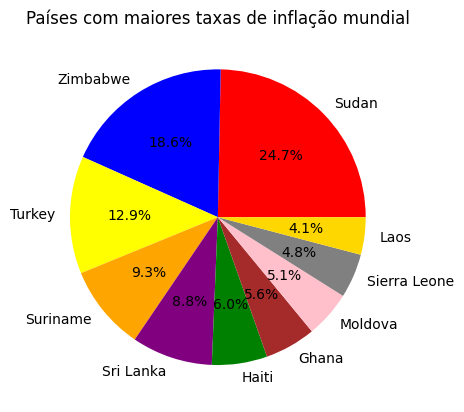

In [ ]:
countries = df_first_ten['Countries']
most_inflations_by_country = df_first_ten['InflationByCountry']
colors = ['red', 'blue', 'yellow', 'orange', 'purple', 'green', 'brown', 'pink', 'gray', 'gold']

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.pie(most_inflations_by_country, labels=countries, colors=colors, autopct='%1.1f%%')
ax.set_title('Países com maiores taxas de inflação mundial')
plt.show()